# Day 8 머신러닝(3)

## 합치기

## merge<br>

2개의 데이터 프레임 합치기<br>
- 합칠 때, on 컬럼명에 해당되는 양쪽에 같은 데이터가 있을 경우 합쳐진다.
- (없으면 합쳐지지 않는다.)
*같은 데이터가 있으면 합쳐지고 같은 데이터가 없으면 삭제됨
- col단위로 join

<1개일 때><br>
-합칠 때, 기준점이 있어야함. on : col명 (on에 있는 col기준으로 합친다.)<br>
-n에 있는 col명이 left, rigth dataframe에 존재해야함.<br>
```py
result = pd.merge(left, right, on="key")<br>
result
 ```
-inner 파라미터가 디폴트값이 있음. (둘다 데이터가 존재할 때만 merge한다.)<br>

<2개 이상><br>
-left쪽으로 많이 사용<br>
: right에 데이터가 없더라도 main데이터는 유지하기 위해서 <br>
(left join하면서 left데이터를 많이 유지하기 위함)<br>
```py
result = pd.merge(left, right, how="left", on=["key1", "key2"])
```

-right인 데이터를 결과값으로 나오려면 순서만 바꿔주기 (실무에서는 사용 잘 안함)
```py
result = pd.merge(right, left how="left", on=["key1", "key2"])
```

<데이터 둘다 살리기>
'outer'
```py
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
```

In [2]:
import numpy as np
import pandas as pd

In [3]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

#이걸 통해서 shape파악하기

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [4]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [9]:
result = pd.merge(left, right, on=["key1", "key2"]) #합치기 #디폴트값이 inner
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


### 문제

In [11]:
# 문제

import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
# 문제

grouped = df.groupby(['sex'])

df_male = grouped.get_group('male')
df_female = grouped.get_group('female')

print(df_male.shape, df_female.shape) 
df_male.head()

(577, 15) (314, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [32]:
# inner merge

# keys = ['survived', 'pclass]
# shape

df_group = pd.merge(df_male, df_female, on=['survived','pclass'])
df_group.shape


(31046, 28)

In [42]:
# left join
# df_male -> 기준 데이터셋
# keys = ['who', 'embarked']
# shape

result = pd.merge(df_male, df_female, how='left' , on=['who','embarked'])
result.shape

(1505, 28)

In [46]:
df_male[['who', 'survived', 'pclass']]
df_female[['who', 'sibsp', 'parch', 'fare']]

# 1. left join -> df_male이 left
# 2. key = who
# 3. is_solo 컬럼 추가 -> 'sibsp', 'parch'의 합이 0인 경우는 True, 아니며 False
# 4. ['is_solo', 'who']의 그룹별 생존률은?


result = pd.merge(df_male, df_female, how='left', on=['who'])

def get_join(row):
    if x == 0:
        return True
    else:
        return False

df['is_solo'] = df[df_male].apply(lambda x:get_join(x['sibsp'],x['parch']), axis = 1)
result.groupby(['is_solo','who'])['survived'].agg('mean')

TypeError: Cannot setitem on a Categorical with a new category (False), set the categories first

In [65]:
# 1. left join -> df_male이 left
# 2. key = who
result = pd.merge(df_male[['who', 'survived', 'pclass']], df_female[['who', 'sibsp', 'parch', 'fare']],how='left', on=['who'])

# 3. is_solo 컬럼 추가 -> 'sibsp', 'parch'의 합이 0인 경우는 True, 아니며 False
def is_solo(row):
    sibsp = row['sibsp']
    if sibsp is None:
        sibsp = 0
    
    parch = row['parch']
    if parch is None:
        parch = 0

    if sibsp + parch > 0:
        return True
    else:
        return False
result['is_solo'] = result.apply(lambda row: is_solo(row), axis = 1)

# 4. ['is_solo', 'who']의 그룹별 생존률은?

result.groupby(['is_solo','who'])['survived'].agg('mean')


is_solo  who  
False    child    0.525000
         man      0.163873
True     child    0.525000
Name: survived, dtype: float64

In [73]:
# 1. df1 -> fare가 10 미만
# 2. df2 -> fare가 30 초과
# 3. row 방향으로 합치기
# 4. shape 구하기



df1 = df_male['fare'] < 10
df2 = df_female['fare'] > 30
result = pd.concat([df1, df2], axis=1)
result.shape


(891, 2)

In [83]:
#reset_index :  index를 재정의해서 적용
#rename : 이름 재정의 / 기존이름 컬럼 : 내가 바꾸고 싶은 컬럼명

# --------
df = sns.load_dataset('titanic')

df = df.reset_index()
df = df.rename(columns={'index':'user_id'})
#  ---------

df_tmp = df[['user_id', 'age', 'sibsp', 'parch']]
df_tmp1 = df[['user_id', 'alone', 'survived']]

# 위의 df_tmp 사용 
# 1. df1 -> age가 10 미만 
df1 = df_tmp[df_tmp['age'] < 10 ]
# 2. df2 -> age가 20~30대(20보다 크거나 같고 40보다 작음)
c1 = df_tmp['age'] >= 20 
c2 = df_tmp['age'] < 40 
c = c1 & c2 
df2 = df_tmp.loc[c]

# 3. df_concat = row 방향으로 합치기
df_concat = pd.concat([df1, df2], ignore_index=True)

# 4. df_concat['is_solo'] 생성
df_concat['is_solo'] = df_concat.apply(lambda row: False if row['sibsp']+row['parch'] else True, axis=1)

# 5. df_merge = df_concat과 df_tmp1를 merge left -> key는  alone과 is_solo를 이용 
# 5-2. merge()에 이런 이슈가 발생할 때도 처리할 수 있는 방법(사용법)이 있지 않을까? 
df_merge2 = pd.merge(df_concat, df_tmp1, how='left', left_on=['user_id', 'is_solo'], right_on=['user_id', 'alone'])
print(df_merge2.shape, df_concat.shape)

# 6. df_merge에서 10미만의 생존률과 20~30대의 생존률 구하시오 
df_merge2['is_10'] = df_merge2['age'].map(lambda x: True if x < 10 else False)
df_merge2.groupby(['is_10'])['survived'].agg('mean')



(449, 7) (449, 5)


is_10
False    0.387597
True     0.612903
Name: survived, dtype: float64

***
## concat()
- 어떤 기준 없이 merge
- row단위로 합칠 때 많이 사용
- index에 있는 숫자기준으로 합쳐진다.
- row/index가 다를경우 엇갈리게 합쳐진다.
: index가 새로 재정의를 따로 해줘야하므로 번거로움 / index정의를 다시 해줘야한다. 안할경우 문제생김

-index 재정의
```py
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result
```

```py
result = pd.concat([df1, df4], ignore_index=True, sort=False) 
#기존 index 무시 /true(index가 엇갈린경우)면 무시, false면 그대로 진행
result 
```

In [47]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

print(df1.shape)
df1.head()

(4, 4)


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [48]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")

result = pd.concat([df1, s1], axis=1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [52]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

print(df4.shape)
df4.head()

(4, 3)


,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [53]:
result = pd.concat([df1, df4], axis=1)
result #index가 다를경우 / 기존의 index 그대로 join된다.(index가 새로 재정의가 안된다.)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [55]:
result = pd.concat([df1, df4], axis=1).reindex(df1.index) #index 재정의
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [54]:
result = pd.concat([df1, df4], ignore_index=True, sort=False) #기존 index 무시
result 

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


***
# Matplotlib (라이브러리)

##### plt.figure() # 그래프를 그리기위한 틀을 만든다.
##### plt.axes() # 틀틀안에 좌표평면들을 그린다.
##### plt.show() # 실제 화면에 표시한다.

In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #matplotlib 실행

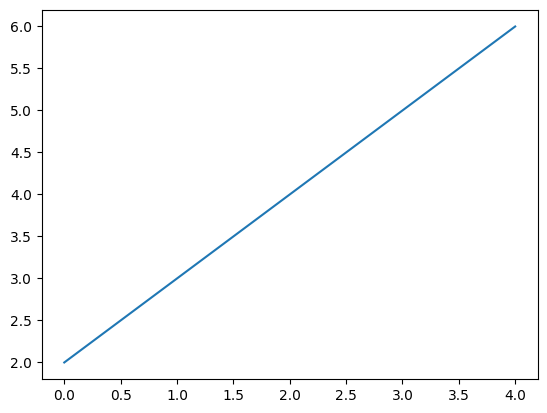

In [86]:
plt.plot(np.arange(2,7)) # 그래프를 그리는 로직 /  np.arange(2,7) 결과값 리스틀 가지고 그래프 생성 / 
# x = index 데이터
plt.show() # 그려진 그래프를 보여주는 로직

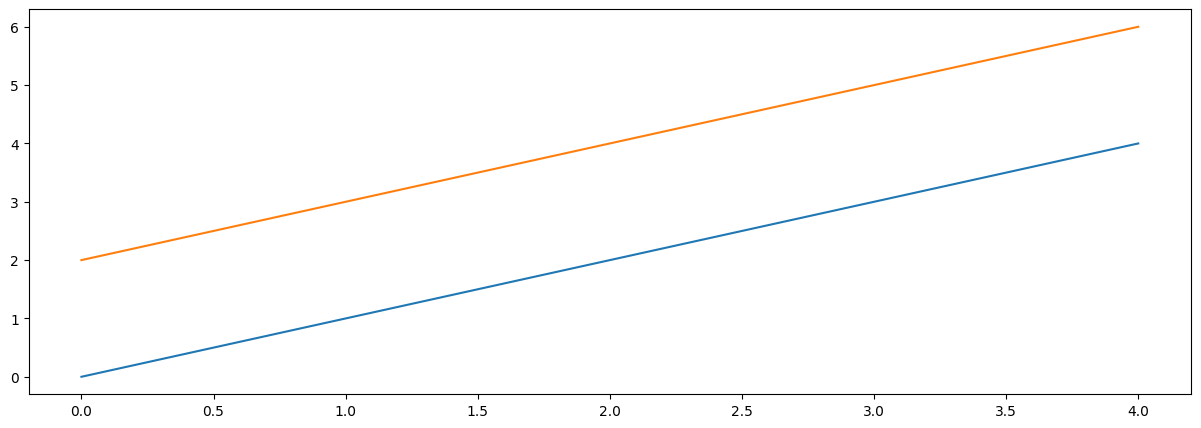

In [87]:
# 틀 크기 (너비, 높이)
plt.figure(figsize=[15,5]) #가로/세로
# 그래프 2개 (그래프 2개 이상 그릴때, plt.plot(np.arrange(입력값)) 추가해주면 됨.
plt.plot(np.arange(5))
plt.plot(np.arange(2,7))
# 화면에 표시
plt.show()

##### subplots

(2, 2)


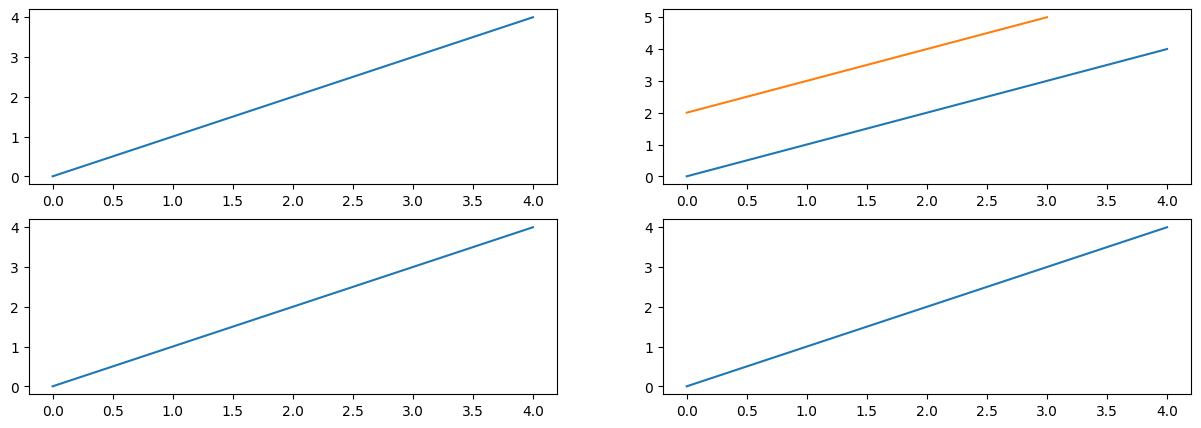

In [88]:
#1번 방법

fig, ax = plt.subplots(2,2,figsize=[15,5]) #subplots(row,col,figsize=[가로/세로])
print(ax.shape)

# 첫번째 로우 & 왼쪽
ax[0,0].plot(np.arange(5))
# 첫번째 로우 & 오른쪽
ax[0,1].plot(np.arange(5))
ax[0,1].plot(np.arange(2,6))
# 두번째 로우 & 왼쪽
ax[1,0].plot(np.arange(5))
# 두번째 로우 & 오른쪽
ax[1,1].plot(np.arange(5))
plt.show()

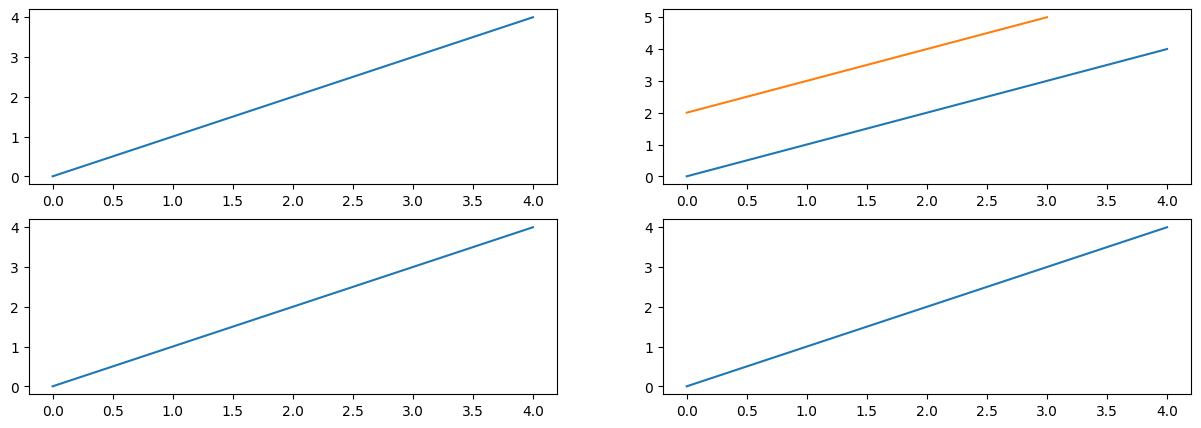

In [89]:
# 2번 방법

arr = np.arange(5)
arr1 = np.arange(2,6)
plt.figure(figsize=[15,5])

plt.subplot(2,2,1) #,빼고 사용해도 똑같음 ex.(221)
plt.plot(arr)

plt.subplot(2,2,2)
plt.plot(arr)
plt.plot(arr1)

plt.subplot(2,2,3)
plt.plot(arr)

plt.subplot(2,2,4)
plt.plot(arr)

plt.show()

##### 타이틀 

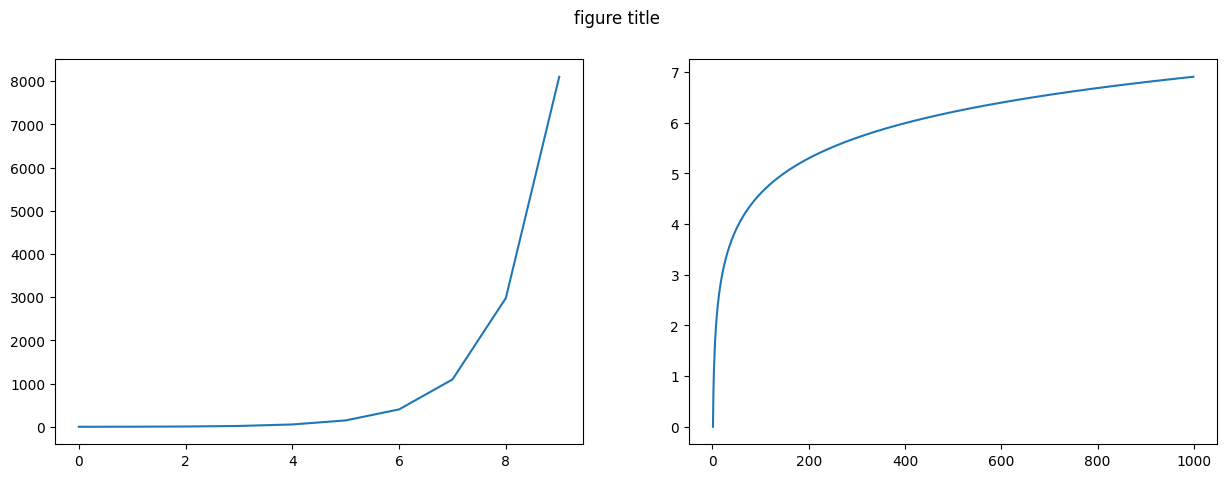

In [90]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("figure title")

x = range(0,10) # x축
y = np.exp(x) # y축
ax[0].plot(x,y)

x = range(1,1000) # x 축
y = np.log(x) # y 축
ax[1].plot(x,y)

plt.show()

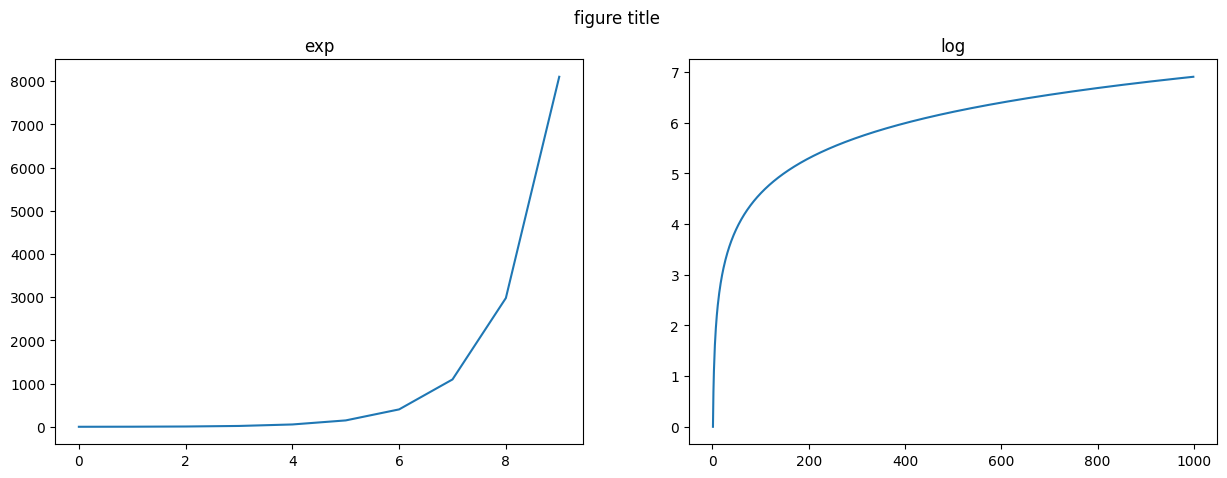

In [91]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("figure title")

x = range(0,10) # x축
y = np.exp(x) # y축
ax[0].plot(x,y)
ax[0].set_title("exp")

x = range(1,1000) # x 축
y = np.log(x) # y 축
ax[1].plot(x,y)
ax[1].set_title("log")

plt.show()

#### 축 제목

c:\dev\pandas\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\dev\pandas\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\dev\pandas\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


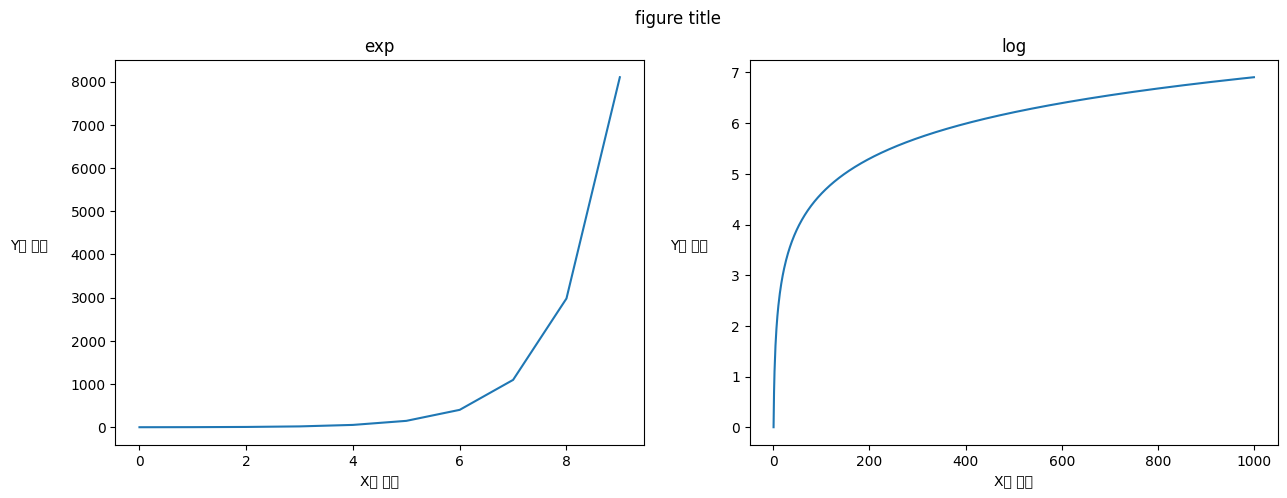

In [92]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("figure title")

x = range(0,10) # x축
y = np.exp(x) # y축
ax[0].plot(x,y)
ax[0].set_title("exp")
ax[0].set_xlabel("X축 이름")
ax[0].set_ylabel("Y축 이름",rotation=0,labelpad=30)

x = range(1,1000) # x 축
y = np.log(x) # y 축
ax[1].plot(x,y)
ax[1].set_title("log")
ax[1].set_xlabel("X축 이름")
ax[1].set_ylabel("Y축 이름",rotation=0,labelpad=30)

plt.show();

#### 눈금
- tick_params
- set_xticks

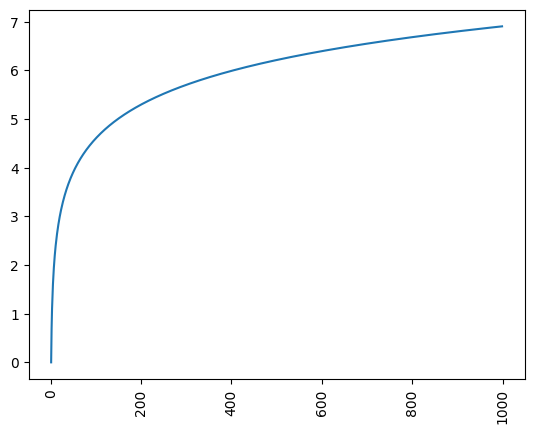

In [93]:
fig,ax = plt.subplots()
ax.plot(x,y)

# 눈금회전
ax.tick_params(axis="x", labelrotation=90) 

plt.show()

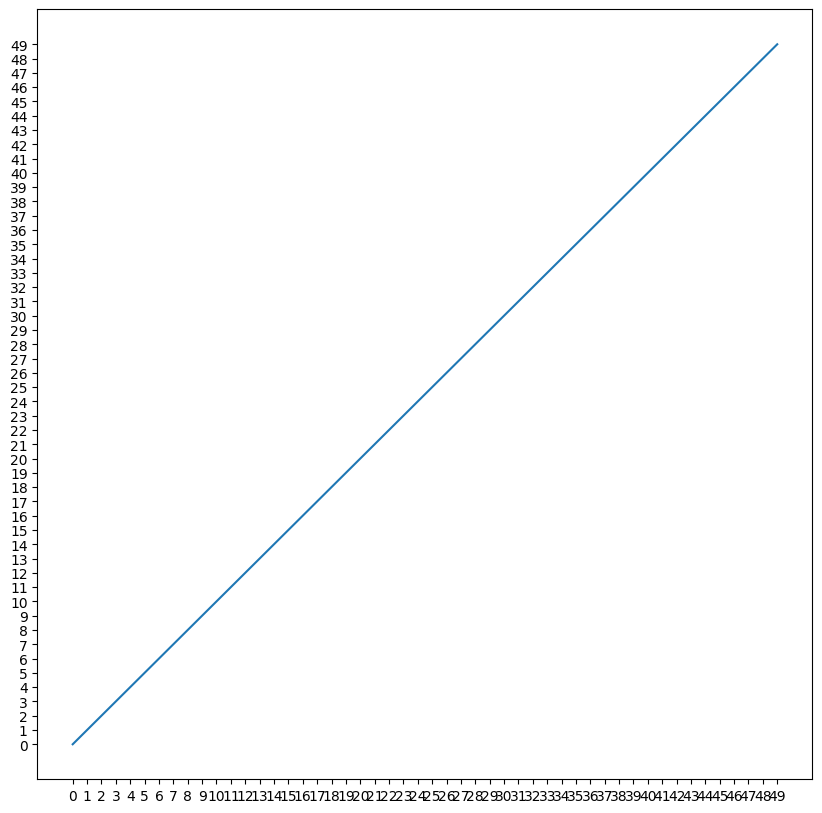

In [94]:
fig,ax = plt.subplots(figsize=[10,10])
ax.plot(range(50))

# 눈금 지정
ax.set_xticks(range(50))
ax.set_yticks(range(50))

plt.show()

#### 그래프 스타일
- 모양,선,색깔 변경

#### 범례표시

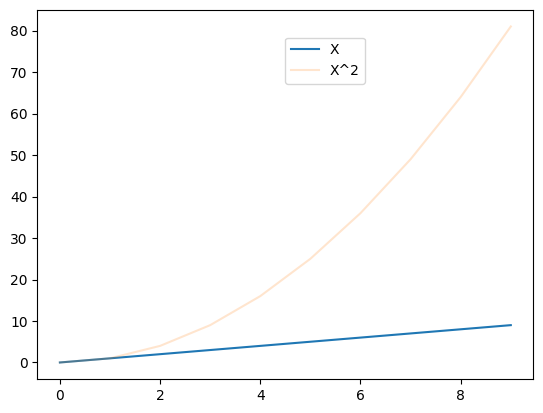

In [96]:
fig,ax = plt.subplots()
x = np.arange(10)

ax.plot(x)
ax.plot(x**2,alpha = 0.2) # alpha 투명도 0~1 사이값을 넣어주면된다.
# 범례 표시
ax.legend(["X","X^2"],loc=[0.5,0.8]) #X,X^2 표기

plt.show()

#### 수평선 그리기
- axhline
- hlines

#### 수직선 그리기
- axvline
- vlines

#### 막대 그래프
범주형 데이터 표현할 때
- plt.bar()
- plt.bar(x, values, color='y')
- plt.bar(x, values, width=0.4) : 막대 폭
- plt.barh(x, values) : 수평막대그래프

#### 산점도 그리기
- 점으로 표현하는 그래프

- plt.scatter(x, y, s=area, c=colors) : 색상 / 크기 변경
- plt.scatter(x, y, alpha=0.5, cmap='Spectral') : 투명도 / 컬러맵


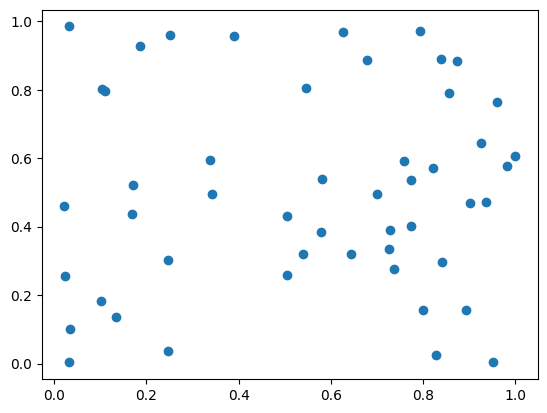

In [97]:
n = 50
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.show()

#### 히스토그램
- plt.hist(weight)
- 나이,요금 표현할 때
- plt.bins 파라미터 : 가로축 구간의 개수를 지정.

#### 히트맵 
: 다양한 값을 갖는 숫자 데이터를 열분포 형태와 같이 색상을 이용해서 시각화
- standard_normal (표준정규분포)


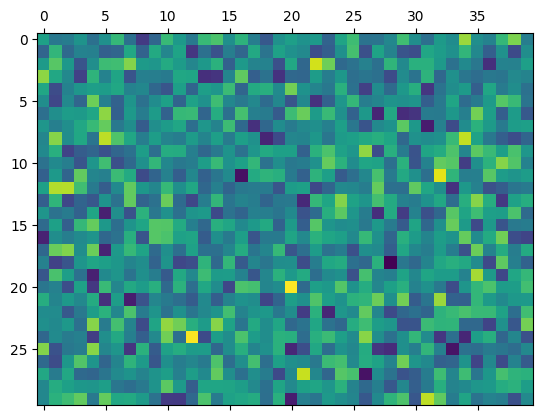

In [98]:
#  히트맵
arr = np.random.standard_normal((30, 40))

plt.matshow(arr)

plt.show()

#### 박스 플롯★

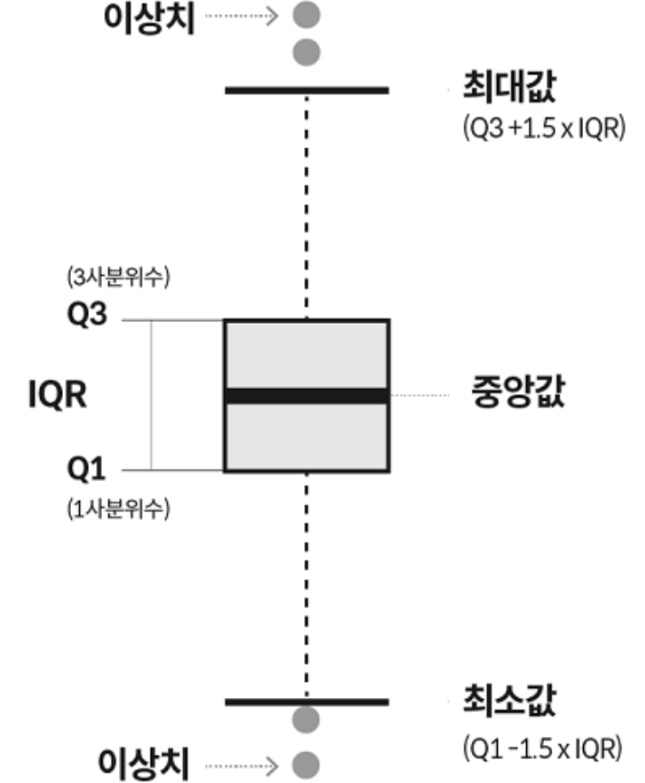

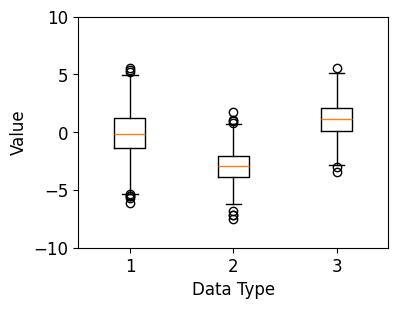

In [99]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot([data_a, data_b, data_c])
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

***
# seaborn
- 데이터마다 그래프 추천

#### Relational plots : 데이터의 상관관계 
#### Distribution plots : 각 데이터에 대한 분포도
- bins 사용으로 디테일하게 나눌 수 있다.
* 범위를 좁히면 실제로는 분포도가 달라질 수 있다.
- rugplot : 히트맵으로 사용
#### Categorical plots
- 범주형 데이터 분석
- 범주형 산점도 : 점이 얼마나 있는지 확인불가(데이터가 많이 겹쳐있어서 확인이 어려움)
=> swarm으로 어느 곳에 데이터가 많이 있는지 확인가능


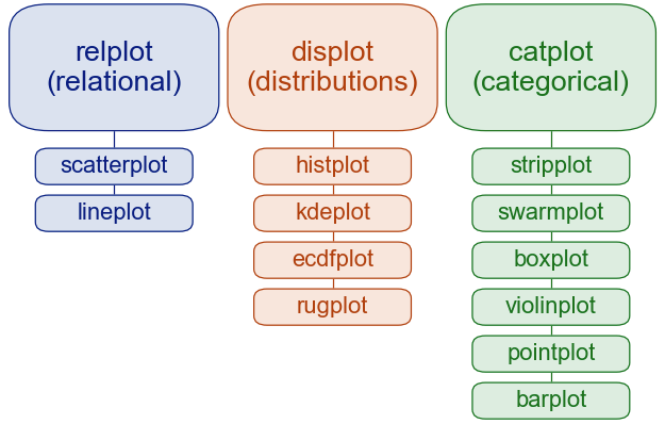

#### 막대그래프


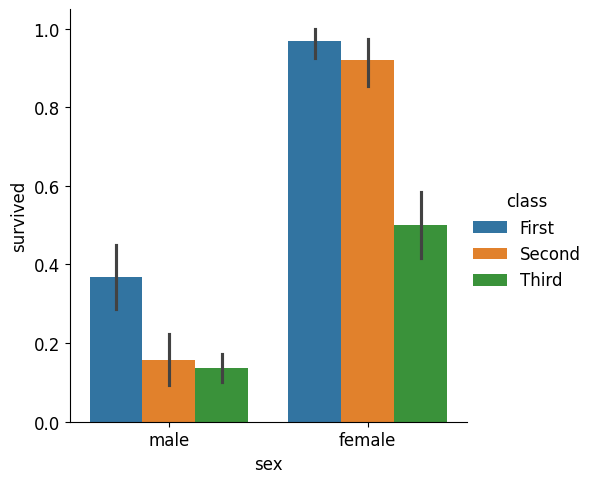

In [100]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

***
# 데이터 시각화

#### 장점
- 심플하고 직관적으로 요약해서 볼 수 있다.
- 누구에게나 데이터 인사트를 찾을 수 있다. (비전문가를 위해서 사용)
- 통계 내에서 확인할 수 없는 추가적인 데이터 분포도 확인가능
- 데이터기반으로 의사결정

#### auto viml
- 시간이 없고 빠르게 데이터화할 때
- 자동화 모듈을 쓰면 특이한 데이터인 경우 찾을 수 없다(해석불가)

***
# 데이터 이해 EDA

### 데이터 종류
- 비정형 데이터 : 텍스트,사진,영상,소리,노래 등등 - 딥러닝 통해서 해결
- 반정형 데이터 : 이메일, HTML 
- 정형 데이터 : 데이터베이스

### 데이터 유형
- 수치형 데이터
    - 연속형 : 실수형 데이터 같은 것
    - 이산형 : 수를 세는것만 가능

- 범주형 데이터 (결정형 ex. 벌점,성적) 
* 수치적으로 판단 어려움 
    - 순서형: 기준이 명확하지 않음 /사람마다 정의하는 내용이 다름 / 정확하지 않지만 순서는 정해져 있다.
    - 명목형: 말 그대로 모든 것/ 순서없음 (혈액형,강아지 품종 등)

***
## Data Leakage(데이터 누수,정보 누설)

- 사람이 모델을 만드는데 test 데이터를 학습에 사용x EDA조차도 하면 안되는데 사용할 경우 데이터 누수


## EDA
- 상관관계분석 => 피어슨 상관관계★
    - 양의 상관 0 < r =< 1
    - 음의 상관 -1 =< r < 0

- 왜도
    -median / mean / mode(채빈값 : 제일 많은것) <br>
    - 3가지 숫자정보만 알고있는 상태에서 누가 크고 작은지 상관관계를 알 수 있다. 예측가능<br>
    => 항상 평균은 꼬리쪽으로 내려간다. <br>
    => symmetrical distribution : 이상치가 거의 없다<br>
    => 너무 커도 이상치, 너무 작아도 이상치<br>
    => df_number['fare'].diff().hist(bins=20) => 한쪽으로 그래프가 몰아져있을 때 로그함수를 치환한다.

- 첨도 : 뾰족한 정도를 나타내는 지표<br>


- 이상치★<br>
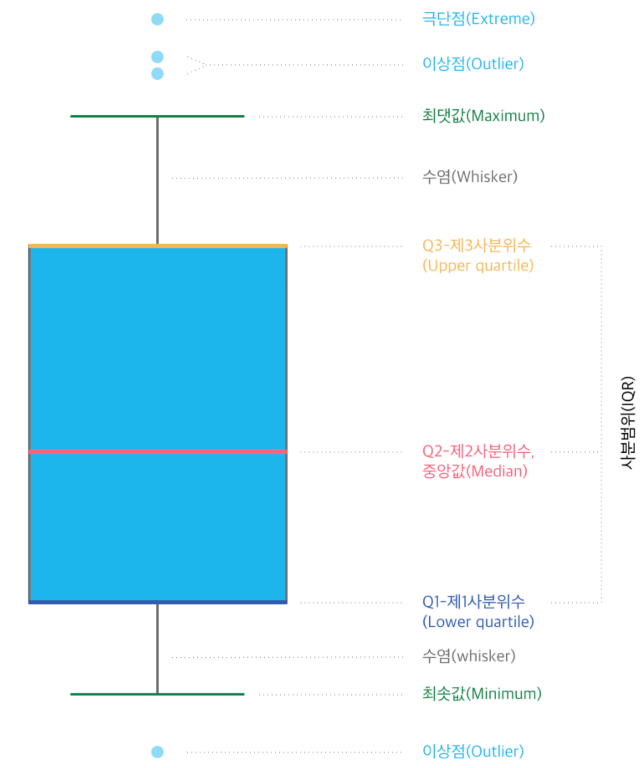




In [101]:
df_number = df.select_dtypes(include=np.number)
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   891 non-null    int64  
 1   survived  891 non-null    int64  
 2   pclass    891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [102]:
df_number.describe() # 범주형 데이터 1.00000 / 수치형 데이터 20.125

,user_id,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
df_number['parch'].unique() #범주형인지 확인할 때 unique로 확인해보기 / 범주형이면 깔끔하게 몇개 안나온다.

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [104]:
df_number['parch'].value_counts() #범주형 분석할 때 사용 value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

##### age 

In [ ]:
df_number['age'].sum() / std() / min() / max() / var() / mean() / mean().. etc

#### 이상치 분석
- 점들을 어떻게 처리할지 => 데이터를 조작하는 것
- 점들이여도 데이터이기 때문에 학습적으로 나쁘지 않게 나옴

<Axes: ylabel='age'>

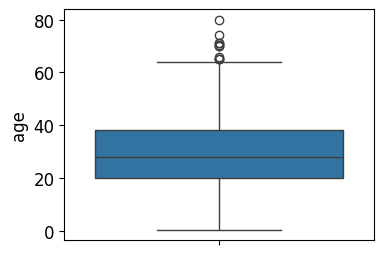

In [105]:
sns.boxplot(y=df_number['age'], data=df)

#### 상관관계 분석

<Axes: xlabel='age', ylabel='fare'>

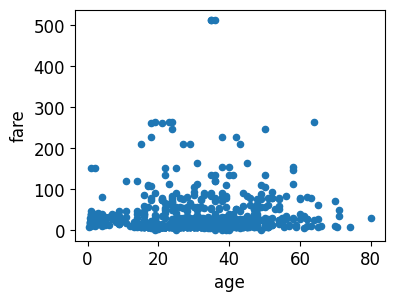

In [106]:
df_number.plot(kind='scatter', x='age', y='fare')

<Axes: >

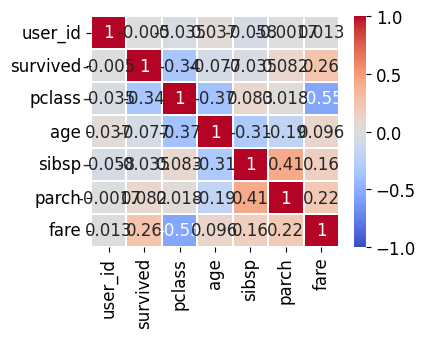

In [108]:
sns.heatmap(df_number.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='coolwarm') #히트맵으로도 많이 사용
# survived가 target pclass가 feature 